# Programming assignment #2
Student: Kecheng Xiao
ID: 1008709140

In [68]:
import pandas as pd
df = pd.read_excel('phone_data.xlsx', 'Sheet 1')
df

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0
...,...,...,...,...,...,...,...,...
333,10-15-2019,11:41:22 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,1,$0.00
334,10-15-2019,11:11:44 AM,TORONTO ON,TORONTO ON,D_3,Outgoing,9,$0.00
335,10-15-2019,11:06:17 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,4,$0.00
336,10-15-2019,11:05:05 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,1,$0.00


In [69]:
def to_table(series, tb_name=None, new_idx_name=None):
    """
    This function convert a Series object to a Dataframe to provide a more table-like output
    :param series: the input series
    :param tb_name: the column of main data, if we want to assign new column name
    :param new_idx_name: the column of data indices, if we want to assign new index name
    :return: the final Dataframe output
    """
    # convert series to dataframe
    dataframe = pd.DataFrame(series)
    # assign new names
    if tb_name:
        dataframe.rename(columns={dataframe.columns[0]:tb_name}, inplace=True)
    if new_idx_name:
        dataframe[new_idx_name] = series.index
    else:
        dataframe[series.index.name] = series.index
    # assign new index with number
    dataframe.index = range(len(series))
    return dataframe

## 1 Criminal investigation

### 1.1 Introduction
You are a member of the Data Science team in the Crime Investigation Unit of Toronto Police. The incoming and outgoing phone calls of a suspect over a few months period are given to you for analysis. Your manager has asked you to answer the following questions.

### 1.2 Most and least frequent outgoing numbers
#### 1. Identify the 3 numbers with the most counts of outgoing calls.

In [70]:
df_call_outgoing = df.loc[df['Call type'] == 'Outgoing']

In [71]:
call_table = df_call_outgoing.groupby(['Number called (to/from)'])['Call type'].count().sort_values(ascending=False)
call_table.head(3)

Number called (to/from)
A_1    111
A_5     48
B_3     28
Name: Call type, dtype: int64

In [72]:
# see the to_table is working
table1 = to_table(call_table.head(3), 'Count of Calls')
table1

,Count of Calls,Number called (to/from)
0,111,A_1
1,48,A_5
2,28,B_3


#### 2. Identify the numbers with the least counts of outgoing calls. If there are ties (e.g. 1 phone call for many numbers) then identify all numbers.

In [73]:
table2 = to_table(call_table.loc[call_table == call_table.min()], 'Count of Calls')
table2

,Count of Calls,Number called (to/from)
0,1,F_2
1,1,F_4
2,1,F_3
3,1,E_5
4,1,F_5
5,1,F_1
6,1,D_2
7,1,E_4
8,1,D_5
9,1,D_1


### 1.3 Highest and lowest total duration of outgoing calls

In [74]:
# Highest
call_table = df_call_outgoing.groupby(['Number called (to/from)'])['Duration'].sum().sort_values(ascending=False)
table3 = to_table(call_table.head(3))
table3

,Duration,Number called (to/from)
0,1146,A_1
1,427,A_5
2,96,A_4


In [75]:
# Lowest
table4 = to_table(call_table.loc[call_table == call_table.min()])
table4

,Duration,Number called (to/from)
0,1,D_5
1,1,E_4
2,1,E_5
3,1,C_1


### 1.4 Location of outgoing calls
What are the number of counts for every location of outgoing calls?

In [76]:
table5 = to_table(df_call_outgoing.groupby(['From city'])['Call type'].count(), 'Number of Outgoing Calls')
table5

,Number of Outgoing Calls,From city
0,1,CLAREMONT ON
1,2,NEWMARKET ON
2,244,TORONTO ON


### 1.5 Incoming and Outgoing calls pattern
#### 1. Calculate the total duration of incoming and outgoing calls per month.

In [77]:
# add new Day, Month and Year columns
df[['Month','Day', 'Year']] = df['Date'].str.split("-",expand=True,)
df['Month'] = pd.Series(df['Month'], dtype='int32')
df['Day'] = pd.Series(df['Day'], dtype='int32')
df['Year'] = pd.Series(df['Year'], dtype='int32')
df

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total,Month,Day,Year
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0,10,14,2019
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0,10,13,2019
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0,10,13,2019
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0,10,13,2019
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0,10,11,2019
...,...,...,...,...,...,...,...,...,...,...,...
333,10-15-2019,11:41:22 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,1,$0.00,10,15,2019
334,10-15-2019,11:11:44 AM,TORONTO ON,TORONTO ON,D_3,Outgoing,9,$0.00,10,15,2019
335,10-15-2019,11:06:17 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,4,$0.00,10,15,2019
336,10-15-2019,11:05:05 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,1,$0.00,10,15,2019


In [78]:
def to_table_multiple2(series, tb_name=None, new_idx_name_ls=None):
    """
    This function convert a Series object to a Dataframe to provide a more table-like output
    :param series: the input series
    :param tb_name: the column of main data, if we want to assign new column name
    :param new_idx_name_ls: the column of data with multi-indexing, if we want to assign new index names for each column
    :return: the final Dataframe output
    """
    # convert
    dataframe = pd.DataFrame(series)
    # assign column names with multiple indices
    if tb_name:
        dataframe.rename(columns={dataframe.columns[0]:tb_name}, inplace=True)
    if new_idx_name_ls:
        dataframe[new_idx_name_ls[0]] = [dataframe.index[s][0] for s in range(len(series))]
        dataframe[new_idx_name_ls[1]] = [dataframe.index[s][1] for s in range(len(series))]
    else:
        dataframe[dataframe.index.names[0]] = [dataframe.index[s][0] for s in range(len(series))]
        dataframe[dataframe.index.names[1]] = [dataframe.index[s][1] for s in range(len(series))]
    # assign new index with numbers
    dataframe.index = range(len(series))
    return dataframe

In [79]:
# get duration per month
table6 = to_table_multiple2(df.groupby(['Month', 'Call type'])['Duration'].sum())
table6

,Duration,Month,Call type
0,84,7,Incoming
1,190,7,Outgoing
2,54,8,Incoming
3,281,8,Outgoing
4,244,9,Incoming
5,714,9,Outgoing
6,63,10,Incoming
7,621,10,Outgoing
8,87,11,Incoming
9,196,11,Outgoing


In [80]:
# convert to the monthly table
table7 = to_table(pd.pivot_table(table6, values='Duration', columns=['Call type'], index=['Month']))
table7.rename_axis(None, axis=1, inplace=True)
table7['Month'] = pd.Categorical(table7['Month'], ordered=True)
table7

,Incoming,Outgoing,Month
0,84,190,7
1,54,281,8
2,244,714,9
3,63,621,10
4,87,196,11


#### 2. Plot the results in one graph for both incoming and outgoing calls.

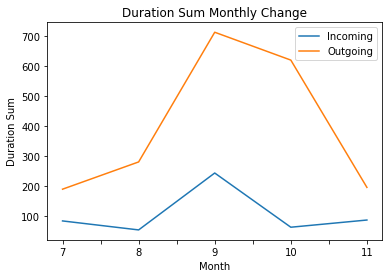

In [81]:
from matplotlib import pyplot as plt
table7.plot(x='Month')
plt.ylabel('Duration Sum')
plt.title('Duration Sum Monthly Change')
plt.show()

#### 3. Do you see anything unusual in the pattern? E.g. does this look like a phone line that was used for criminal activities or more like a personal phone?

Answer: People are calling much more than receiving calls over every month, which may imply there is a spam calling activity from these regions.

### 1.6 Distribution of calls

Plot the histogram of the outbound call counts; e.g. x-axis: the call counts per client called, y-axis: number of clients called.

In [82]:
table8 = pd.DataFrame(df_call_outgoing.groupby(['Number called (to/from)'])['Number called (to/from)'].count())
table8

,Number called (to/from)
Number called (to/from),
A_1,111
A_2,2
A_3,2
A_4,12
A_5,48
B_1,2
B_2,4
B_3,28
B_4,3


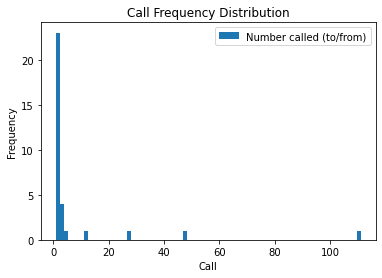

In [83]:
table8.plot.hist(bins=77)
plt.xlabel('Call')
plt.title('Call Frequency Distribution')
plt.show()

## 2 The ergodicity problem in economics

### 2.1 Introduction

Here, we will reproduce some simulations from a simple gambling experiment used in the recent paper "The ergodicity problem in economics" by Ole Peters (for a simpler description of the problem and its implications refer to the Bloomberg article here).

Ergodicity is a term used mainly in equilibrium statistical mechanics and in many other areas including economics. A process is called ergodic if the time average and the expectation value are equal. The author, a physicist who specializes in statistical mechanics, claims that its use in economics is abusive, and it has led to the narrative of human irrationality.
<br />
<br />

### 2.2 The statistical problem

Starting with an initial wealth of 100$, you engage into a simple coin-flipping game in which your wealth increases by 50% every time you flip heads, and you lose 40% if you flip tails. Since tossing heads or tails is just as likely, it makes sense to accept such a game if you play enough times because your potential gain is larger than your potential loss each time you play. Yet, as we will see this is a paradox.
<br />
<br />

### 2.3 Coding the problem

Below is a description of a simple set of steps you can follow to code this problem. It is not optimal for computation, but it is simple to understand the steps. If you want to follow a different logic
<br />
<br />

#### 1.Generate a pandas dataframe that simulates N coin tosses for w gamblers with the np.random.rand function. Set N=100 coin tosses and w=100 gamblers and add the prefix ’prob ’ to the column name.

In [112]:
# set param
N = 100
w = 100

In [113]:
# add prefix and create Dataframe
import numpy as np
np.random.seed(7)
df_sim = pd.DataFrame(np.random.rand(N, w))
df_sim = df_sim.add_prefix('prob_')
df_sim

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,prob_90,prob_91,prob_92,prob_93,prob_94,prob_95,prob_96,prob_97,prob_98,prob_99
0,0.076308,0.779919,0.438409,0.723465,0.977990,0.538496,0.501120,0.072051,0.268439,0.499883,...,0.800479,0.939111,0.040656,0.875672,0.276563,0.475764,0.796761,0.717242,0.147148,0.658748
1,0.069252,0.357071,0.812830,0.427705,0.599854,0.728161,0.821228,0.760515,0.007143,0.420257,...,0.106877,0.369486,0.232671,0.451079,0.276317,0.501807,0.922603,0.382511,0.650128,0.595621
2,0.751954,0.061665,0.744824,0.946276,0.603560,0.287580,0.672369,0.712049,0.656450,0.146930,...,0.149225,0.161200,0.052756,0.047013,0.948428,0.091292,0.508352,0.118630,0.214788,0.763072
3,0.938135,0.469713,0.005642,0.999208,0.047773,0.389448,0.539057,0.891733,0.823112,0.609387,...,0.500985,0.714908,0.423830,0.712327,0.274802,0.927208,0.541963,0.241649,0.437197,0.895097
4,0.807055,0.484469,0.351702,0.376247,0.981195,0.112213,0.889024,0.857609,0.224388,0.349359,...,0.725272,0.515448,0.820666,0.113211,0.603653,0.989602,0.149079,0.495036,0.630145,0.337529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.310675,0.940098,0.246368,0.540498,0.896250,0.345963,0.493177,0.468563,0.920946,0.387832,...,0.479222,0.411118,0.035387,0.975483,0.227321,0.152959,0.599018,0.198959,0.911053,0.880093
96,0.658693,0.420820,0.150789,0.216787,0.111137,0.134196,0.737811,0.174432,0.135037,0.609336,...,0.589095,0.338848,0.944353,0.348883,0.378705,0.647945,0.285986,0.278409,0.112855,0.514255
97,0.673143,0.413317,0.902757,0.254072,0.686690,0.628746,0.576984,0.221345,0.758138,0.678197,...,0.463528,0.108418,0.027191,0.028279,0.675684,0.005458,0.844822,0.520793,0.378417,0.539644
98,0.667598,0.259200,0.924897,0.176299,0.127888,0.626427,0.727995,0.434616,0.539986,0.427192,...,0.151517,0.153226,0.592929,0.745177,0.444368,0.668295,0.387119,0.812531,0.514946,0.447510


#### 2. Initialize an additional w columns ['balance_' + str(x)] with the value 100 to capture the initial wealth of 100$, where: x in range(0, w).

In [114]:
# add new columns of balances
col_name = ['balance_'+str(x) for x in range(w)]
balance_init = [[100] * w] * N
df_bala_player = pd.DataFrame(balance_init, columns=col_name)
df_sim = pd.concat([df_sim, df_bala_player], axis=1)
df_sim

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.076308,0.779919,0.438409,0.723465,0.977990,0.538496,0.501120,0.072051,0.268439,0.499883,...,100,100,100,100,100,100,100,100,100,100
1,0.069252,0.357071,0.812830,0.427705,0.599854,0.728161,0.821228,0.760515,0.007143,0.420257,...,100,100,100,100,100,100,100,100,100,100
2,0.751954,0.061665,0.744824,0.946276,0.603560,0.287580,0.672369,0.712049,0.656450,0.146930,...,100,100,100,100,100,100,100,100,100,100
3,0.938135,0.469713,0.005642,0.999208,0.047773,0.389448,0.539057,0.891733,0.823112,0.609387,...,100,100,100,100,100,100,100,100,100,100
4,0.807055,0.484469,0.351702,0.376247,0.981195,0.112213,0.889024,0.857609,0.224388,0.349359,...,100,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.310675,0.940098,0.246368,0.540498,0.896250,0.345963,0.493177,0.468563,0.920946,0.387832,...,100,100,100,100,100,100,100,100,100,100
96,0.658693,0.420820,0.150789,0.216787,0.111137,0.134196,0.737811,0.174432,0.135037,0.609336,...,100,100,100,100,100,100,100,100,100,100
97,0.673143,0.413317,0.902757,0.254072,0.686690,0.628746,0.576984,0.221345,0.758138,0.678197,...,100,100,100,100,100,100,100,100,100,100
98,0.667598,0.259200,0.924897,0.176299,0.127888,0.626427,0.727995,0.434616,0.539986,0.427192,...,100,100,100,100,100,100,100,100,100,100


#### Create a two-level for loop that iterates through rows 1 to N first and columns w to 2×w next implementing the calculation logic for every prob-balance pair:

Balance\^i = 1.5\*Balance\^{i-1} if prob\^{i-1} >=.5
Balance\^i = 1.5\*Balance\^{i-1} if prob\^{i-1} <.5

In [115]:
# update balance with prob
for i in range(1, N):
    for j in range(w, 2*w):
        if df_sim.iloc[i-1,j-w] >= 0.5:
            df_sim.iloc[i,j] = df_sim.iloc[i-1,j]*1.5
        else:
            df_sim.iloc[i,j] = df_sim.iloc[i-1,j]*0.6
df_sim

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.076308,0.779919,0.438409,0.723465,0.977990,0.538496,0.501120,0.072051,0.268439,0.499883,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,0.069252,0.357071,0.812830,0.427705,0.599854,0.728161,0.821228,0.760515,0.007143,0.420257,...,150.000000,150.000000,60.000000,150.000000,60.000000,60.000000,150.000000,150.000000,60.000000,150.000000
2,0.751954,0.061665,0.744824,0.946276,0.603560,0.287580,0.672369,0.712049,0.656450,0.146930,...,90.000000,90.000000,36.000000,90.000000,36.000000,90.000000,225.000000,90.000000,90.000000,225.000000
3,0.938135,0.469713,0.005642,0.999208,0.047773,0.389448,0.539057,0.891733,0.823112,0.609387,...,54.000000,54.000000,21.600000,54.000000,54.000000,54.000000,337.500000,54.000000,54.000000,337.500000
4,0.807055,0.484469,0.351702,0.376247,0.981195,0.112213,0.889024,0.857609,0.224388,0.349359,...,81.000000,81.000000,12.960000,81.000000,32.400000,81.000000,506.250000,32.400000,32.400000,506.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.310675,0.940098,0.246368,0.540498,0.896250,0.345963,0.493177,0.468563,0.920946,0.387832,...,0.067869,0.000695,0.001737,258.898333,6.627797,0.000018,25283.040369,6.627797,1.060448,2.651119
96,0.658693,0.420820,0.150789,0.216787,0.111137,0.134196,0.737811,0.174432,0.135037,0.609336,...,0.040721,0.000417,0.001042,388.347500,3.976678,0.000011,37924.560554,3.976678,1.590671,3.976678
97,0.673143,0.413317,0.902757,0.254072,0.686690,0.628746,0.576984,0.221345,0.758138,0.678197,...,0.061082,0.000250,0.001564,233.008500,2.386007,0.000016,22754.736332,2.386007,0.954403,5.965018
98,0.667598,0.259200,0.924897,0.176299,0.127888,0.626427,0.727995,0.434616,0.539986,0.427192,...,0.036649,0.000150,0.000938,139.805100,3.579011,0.000010,34132.104498,3.579011,0.572642,8.947526


#### 4. Plot the time trajectories (in gamble iterations) of the wealth per gambler and calculate how many gamblers have more than their initial 100 dollar. What happens when you increase N to 1,000 (Figure 2 in the original paper, except the red and blue line)? How many gamblers with more than 100 dollar do you have at t=1,000?

Answer: When N=100, there are 12 gamblers win more than the initial. When N=1000, there is 0 gambler win more than the initial.

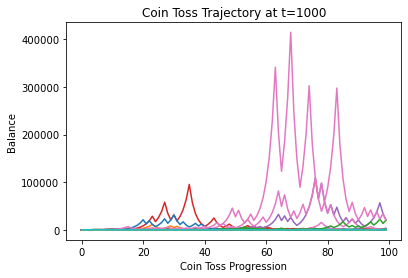

In [116]:
# plot with the normal and log balance graph
from matplotlib import pyplot as plt
df_sim[col_name].plot(legend=None)
plt.xlabel('Coin Toss Progression')
plt.ylabel('Balance')
plt.title('Coin Toss Trajectory at t=1000')
plt.show()

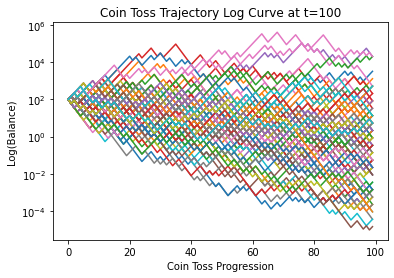

In [117]:
df_sim[col_name].plot(legend=None)
plt.xlabel('Coin Toss Progression')
plt.ylabel('Log(Balance)')
plt.title('Coin Toss Trajectory Log Curve at t=100')
plt.yscale('log')
plt.show()

In [118]:
# find player gain over the initial
def num_winner(df_simulation, over=100, n_rep=100, n_player=100):
    final = df_simulation.iloc[n_rep-1,n_player:]
    return sum(map(lambda x: x > over, final))
num_winner(df_sim)

12

In [119]:
def gamble_ht(N_rep, w_gambler, start_balance = 100, seed=8):
    """
    This is a repeat of 3-5
    :param N_rep: N coin tosses
    :param w_gambler: w number of gambler
    :param start_balance: the start balance for every player
    :param seed: the random seed
    :return: Dataframe table of result
    """
    np.random.seed(seed)
    df_simu = pd.DataFrame(np.random.rand(N_rep, w_gambler))
    df_simu = df_simu.add_prefix('prob_')

    # add columns
    col_balance = ['balance_'+str(x) for x in range(w_gambler)]
    df_balance_player = pd.DataFrame([[start_balance] * w_gambler] * N_rep, columns=col_balance)
    df_simu = pd.concat([df_simu, df_balance_player], axis=1)

    # cycle all probs to balance changes
    for i_ in range(1, N_rep):
        for j_ in range(w_gambler, 2*w_gambler):
            if df_simu.iloc[i_-1,j_-w_gambler] >= 0.5:
                df_simu.iloc[i_,j_] = df_simu.iloc[i_-1,j_]*1.5
            else:
                df_simu.iloc[i_,j_] = df_simu.iloc[i_-1,j_]*0.6
    return df_simu

In [120]:
# new iteration with N=1000
N = 1000
df_sim_2 = gamble_ht(N, w)
df_sim_2

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,0.873429,0.968541,0.869195,0.530856,0.232728,0.011399,0.430469,0.402351,0.522675,0.478392,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
1,0.310902,0.841306,0.390119,0.895533,0.098472,0.910560,0.728855,0.127185,0.718059,0.907060,...,6.000000e+01,1.500000e+02,6.000000e+01,1.500000e+02,1.500000e+02,6.000000e+01,6.000000e+01,1.500000e+02,6.000000e+01,6.000000e+01
2,0.901550,0.510928,0.622906,0.208874,0.547106,0.219138,0.973114,0.135033,0.260057,0.554178,...,9.000000e+01,2.250000e+02,9.000000e+01,2.250000e+02,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,3.600000e+01
3,0.427570,0.201062,0.028553,0.460936,0.147156,0.376168,0.723402,0.463376,0.803533,0.025126,...,5.400000e+01,3.375000e+02,1.350000e+02,3.375000e+02,1.350000e+02,1.350000e+02,5.400000e+01,1.350000e+02,1.350000e+02,2.160000e+01
4,0.644761,0.052693,0.827774,0.250281,0.500830,0.492513,0.305117,0.169704,0.238539,0.574000,...,3.240000e+01,2.025000e+02,8.100000e+01,5.062500e+02,2.025000e+02,2.025000e+02,3.240000e+01,8.100000e+01,2.025000e+02,3.240000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.221290,0.230218,0.634334,0.408710,0.379973,0.764347,0.377806,0.043972,0.491257,0.951389,...,7.302277e-27,1.062621e-19,1.037716e-17,1.782783e-24,2.720310e-21,9.896431e-14,2.720310e-21,7.656993e-31,1.546317e-12,7.656993e-31
996,0.719606,0.646775,0.579465,0.002232,0.584566,0.813977,0.446799,0.713616,0.675428,0.987749,...,1.095342e-26,6.375727e-20,6.226296e-18,1.069670e-24,1.632186e-21,1.484465e-13,1.632186e-21,4.594196e-31,9.277904e-13,1.148549e-30
997,0.678971,0.389504,0.999536,0.880802,0.283534,0.213097,0.013138,0.588290,0.989131,0.381946,...,1.643012e-26,9.563591e-20,9.339444e-18,6.418017e-25,2.448279e-21,8.906788e-14,2.448279e-21,2.756517e-31,1.391686e-12,1.722823e-30
998,0.761154,0.384300,0.549670,0.700934,0.572791,0.427179,0.840221,0.559582,0.239605,0.147907,...,9.858075e-27,5.738155e-20,5.603667e-18,9.627026e-25,3.672419e-21,5.344073e-14,1.468968e-21,4.134776e-31,2.087528e-12,2.584235e-30


,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.873429,0.968541,0.869195,0.530856,0.232728,0.011399,0.430469,0.402351,0.522675,0.478392,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
1,0.502077,0.997119,0.984041,0.227079,0.849957,0.812818,0.236134,0.656853,0.977171,0.731569,...,6.000000e+01,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,6.000000e+01,6.000000e+01,1.500000e+02,6.000000e+01,1.500000e+02
2,0.386512,0.497168,0.303541,0.013041,0.876850,0.236095,0.218901,0.004165,0.260031,0.274992,...,9.000000e+01,2.250000e+02,9.000000e+01,2.250000e+02,9.000000e+01,3.600000e+01,3.600000e+01,9.000000e+01,3.600000e+01,9.000000e+01
3,0.184432,0.298911,0.048582,0.277799,0.083110,0.029147,0.964623,0.326397,0.688506,0.279715,...,1.350000e+02,1.350000e+02,5.400000e+01,3.375000e+02,1.350000e+02,2.160000e+01,5.400000e+01,5.400000e+01,2.160000e+01,5.400000e+01
4,0.499380,0.417676,0.402455,0.193099,0.497807,0.648015,0.633113,0.854370,0.018889,0.201151,...,8.100000e+01,2.025000e+02,8.100000e+01,5.062500e+02,8.100000e+01,1.296000e+01,3.240000e+01,3.240000e+01,1.296000e+01,3.240000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.680222,0.862487,0.021655,0.253296,0.256323,0.063859,0.710333,0.216153,0.981266,0.237856,...,4.563923e-26,4.250485e-20,6.800776e-21,7.477532e-29,4.785621e-30,1.062621e-19,7.302277e-27,1.583429e-14,2.852452e-25,4.150864e-18
996,0.407554,0.258634,0.355609,0.655731,0.660521,0.251836,0.735187,0.264375,0.664477,0.866562,...,2.738354e-26,6.375727e-20,4.080465e-21,1.121630e-28,2.871372e-30,6.375727e-20,4.381366e-27,9.500574e-15,4.278678e-25,2.490518e-18
997,0.189160,0.016117,0.471730,0.128552,0.927682,0.718233,0.579297,0.700800,0.253900,0.758444,...,1.643012e-26,3.825436e-20,6.120698e-21,1.682445e-28,4.307058e-30,9.563591e-20,2.628820e-27,1.425086e-14,6.418017e-25,1.494311e-18
998,0.307832,0.696772,0.465745,0.576286,0.668413,0.135692,0.161037,0.375132,0.217110,0.549177,...,2.464519e-26,5.738155e-20,9.181047e-21,1.009467e-28,6.460588e-30,1.434539e-19,1.577292e-27,2.137629e-14,9.627026e-25,2.241467e-18


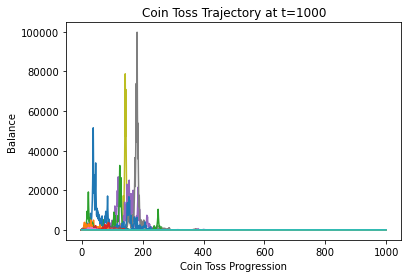

In [121]:
# plot with the normal and log balance graph, N=1000
from matplotlib import pyplot as plt
df_sim_2[col_name].plot(legend=None)
plt.xlabel('Coin Toss Progression')
plt.ylabel('Balance')
plt.title('Coin Toss Trajectory at t=1000')
plt.show()

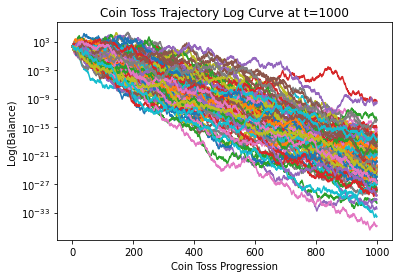

In [122]:
df_sim_2[col_name].plot(legend=None)
plt.xlabel('Coin Toss Progression')
plt.ylabel('Log(Balance)')
plt.title('Coin Toss Trajectory Log Curve at t=1000')
plt.yscale('log')
plt.show()

In [95]:
# number of winner
num_winner(df_sim_2, n_rep=N)

0

#### 5. Plot the time trajectories of the mean and median wealth at every time point from 0 to 1,000. Try both linear and logarithmic scaler for the wealth axis. What are your observations?

Answer: \[Normal\] When coin toss progression before around 200, the mean has very high variability and extremely right skewed. After 200, the mean and median curves are combined.
Answer: \[Log\] The median is linearly decreased and the mean has a higher variability and decrease slower than the median curve.

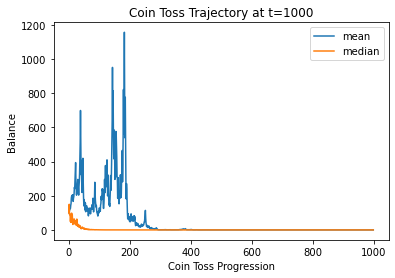

In [96]:
plt.plot(df_sim_2.index, df_sim_2.iloc[:, w:].mean(axis=1), label='mean')
plt.plot(df_sim_2.index, df_sim_2.iloc[:, w:].median(axis=1), label='median')
plt.xlabel('Coin Toss Progression')
plt.ylabel('Balance')
plt.title('Coin Toss Trajectory at t=1000')
plt.legend()
plt.show()

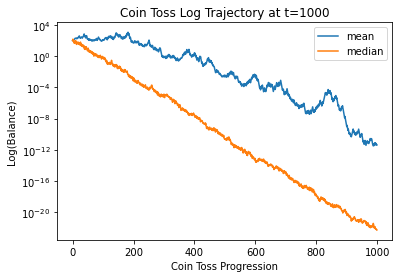

In [123]:
plt.plot(df_sim_2.index, df_sim_2.iloc[:, w:].mean(axis=1), label='mean')
plt.plot(df_sim_2.index, df_sim_2.iloc[:, w:].median(axis=1), label='median')
plt.xlabel('Coin Toss Progression')
plt.ylabel('Log(Balance)')
plt.title('Coin Toss Log Trajectory at t=1000')
plt.yscale('log')
plt.legend()
plt.show()

#### 6. Repeat steps 3-5 with N=10 and w=1,000 with the following logic:
Balance\^i = 1.5\*Balance\^{i-1} if prob\^{i-1} >=.5
Balance\^i = 1.5\*Balance\^{i-1} if prob\^{i-1} <.5
#### How are the results diﬀerent than the previous logic?
Answer: Due to the balance gain/loss function has become a linear by -50 or +40, which cause the mean and median has almost no difference. Also, since we are gain more than the loss, so in a long-term run, the balance of all player will get pass their initial balance eventually.

In [126]:
def gamble_ht2(N_rep, w_gambler, seed=10, start_balance = 100):
    np.random.seed(seed)
    df_simu = pd.DataFrame(np.random.rand(N_rep, w_gambler))
    df_simu = df_simu.add_prefix('prob_')

    # add columns
    col_balance = ['balance_'+str(x) for x in range(w_gambler)]
    df_balance_player = pd.DataFrame([[start_balance] * w_gambler] * N_rep, columns=col_balance)
    df_simu = pd.concat([df_simu, df_balance_player], axis=1)

    # cycle all probs to balance changes
    for i_ in range(1, N_rep):
        for j_ in range(w_gambler, 2*w_gambler):
            if df_simu.iloc[i_-1,j_-w_gambler] >= 0.5:
                df_simu.iloc[i_,j_] = df_simu.iloc[i_-1,j_]+50
            else:
                df_simu.iloc[i_,j_] = df_simu.iloc[i_-1,j_]-40
    return df_simu

In [127]:
# 2.3.3
# new iteration
N = 10
w = 1000
df_sim_3 = gamble_ht2(N, w, seed=9)
df_sim_3

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,0.010374,0.501875,0.495773,0.133830,0.142111,0.218559,0.418508,0.248101,0.084060,0.345499,...,100,100,100,100,100,100,100,100,100,100
1,0.857233,0.973788,0.801392,0.576107,0.781756,0.587304,0.391633,0.240126,0.609403,0.109032,...,150,60,60,60,150,150,150,150,150,150
2,0.495659,0.003012,0.566512,0.213042,0.981944,0.760939,0.080864,0.236315,0.608591,0.167022,...,200,110,110,20,110,110,110,200,110,200
3,0.476931,0.404242,0.914294,0.166327,0.698433,0.546445,0.042552,0.072743,0.919869,0.611321,...,250,70,160,-20,160,70,70,250,160,160
4,0.611541,0.840361,0.067534,0.878389,0.578199,0.029018,0.371750,0.126198,0.112973,0.178787,...,300,120,210,30,120,30,30,300,120,120
5,0.625011,0.851584,0.446515,0.552347,0.945807,0.597704,0.198585,0.108532,0.778616,0.027536,...,350,80,170,-10,80,80,-10,260,170,80
6,0.655052,0.551504,0.601742,0.583636,0.239334,0.247142,0.351111,0.551838,0.622320,0.092890,...,400,40,220,40,40,40,40,310,220,40
7,0.882877,0.892915,0.551837,0.190284,0.484015,0.513466,0.049866,0.843451,0.376379,0.089781,...,360,0,270,0,90,90,90,360,270,90
8,0.087571,0.426245,0.459870,0.401346,0.858790,0.135604,0.517463,0.276013,0.606282,0.432892,...,410,-40,320,50,50,50,50,320,320,140
9,0.148866,0.905308,0.947827,0.816955,0.454723,0.895010,0.363253,0.368454,0.886450,0.687772,...,370,-80,370,10,100,10,10,370,280,190


In [128]:
# 2.3.4
# number of winner
num_winner(df_sim_3, 100, N, w)

495

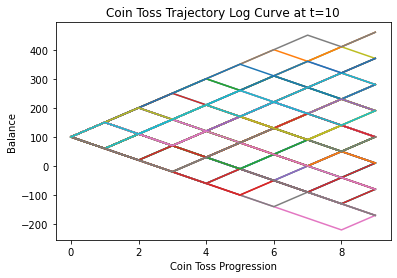

In [130]:
df_sim_3[col_name].plot(legend=None)
plt.xlabel('Coin Toss Progression')
plt.ylabel('Balance')
plt.title('Coin Toss Trajectory Log Curve at t=10')
plt.show()

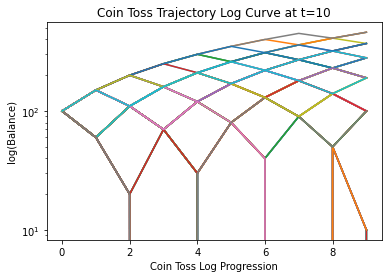

In [131]:
df_sim_3[col_name].plot(legend=None)
plt.xlabel('Coin Toss Log Progression')
plt.ylabel('log(Balance)')
plt.title('Coin Toss Trajectory Log Curve at t=10')
plt.yscale('log')
plt.show()

In [132]:
# with N=1000
N = 1000
df_sim_3 = gamble_ht2(N, w, seed=10)

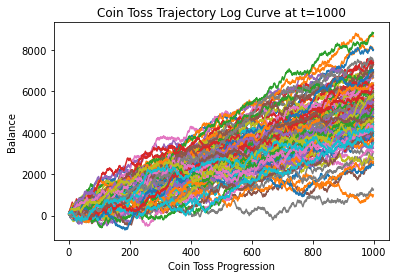

In [133]:
df_sim_3[col_name].plot(legend=None)
plt.xlabel('Coin Toss Progression')
plt.ylabel('Balance')
plt.title('Coin Toss Trajectory Log Curve at t=1000')
plt.show()

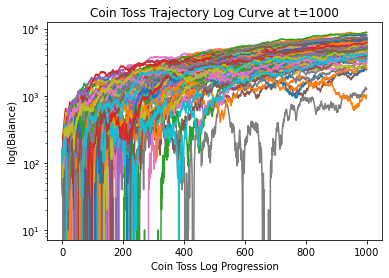

In [134]:
df_sim_3[col_name].plot(legend=None)
plt.xlabel('Coin Toss Log Progression')
plt.ylabel('log(Balance)')
plt.title('Coin Toss Trajectory Log Curve at t=1000')
plt.yscale('log')
plt.show()

In [135]:
num_winner(df_sim_3, n_rep=1000, n_player=1000)

1000

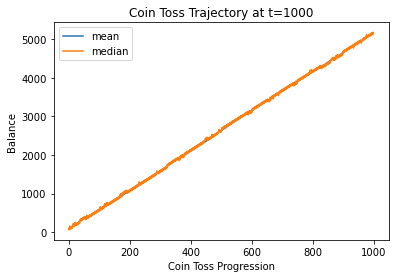

In [136]:
# 2.3.5
plt.plot(df_sim_3.index, df_sim_3.iloc[:, w:].mean(axis=1), label='mean')
plt.plot(df_sim_3.index, df_sim_3.iloc[:, w:].median(axis=1), label='median')
plt.xlabel('Coin Toss Progression')
plt.ylabel('Balance')
plt.title('Coin Toss Trajectory at t=1000')
plt.legend()
plt.show()

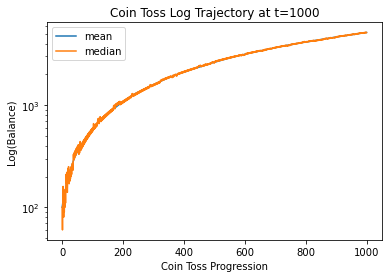

In [137]:
plt.plot(df_sim_3.index, df_sim_3.iloc[:, w:].mean(axis=1), label='mean')
plt.plot(df_sim_3.index, df_sim_3.iloc[:, w:].median(axis=1), label='median')
plt.xlabel('Coin Toss Progression')
plt.ylabel('Log(Balance)')
plt.title('Coin Toss Log Trajectory at t=1000')
plt.yscale('log')
plt.legend()
plt.show()